In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt

In [6]:
import pickle
with open('gamematches.pickle', 'rb') as handle:
    gamematches = pickle.load(handle)

## Collecting Google Trends Data
Using __[pytrends](https://github.com/GeneralMills/pytrends)__, a google trends unofficial API to gather trends search data over the past 10 years on all our games.

In [7]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

from time import sleep
import timeit
def req(kw_list, slp, tf):
    while True:
        sleep(slp)
        try:
            pytrends.build_payload(kw_list, cat=0, timeframe=tf, geo='US', gprop='')
            trends = pytrends.interest_over_time()
            break
        except:
            print("wait...")
            sleep(60) #Too many requests made to google trends requires 60 seconds of sleep.
    return trends

Google Trends data normalizes the maximum search frequency of a request to 100. So to get relative data for every game,
All games first get trends relative to Halo 4 (between 2008 and 2013) and Dark Souls III (between 2013 and 2018), then all found relative to Dark Souls III.

In [9]:
kw_list = ["Halo 4"]
alltrends1 = req(kw_list, slp=0.1, tf = '2008-12-22 2013-12-15')
alltrends1.loc[:,"Halo 4"] *= 88/100 #rescaled to Dark Souls III

kw_list = ['/m/013f7bmb'] #Dark Souls III
alltrends2 = req(kw_list, slp=0.1, tf = '2013-12-22 2018-12-16')
alltrends2.columns = ['Dark Souls III', 'isPartial'] 

for i in range(0,len(gamematches)):
    [game,match_n,match] = gamematches[i]
    if game == "Halo 4" or game =='Dark Souls III':
        pass
    else:
        kw_list1 = ["Halo 4",match]
        trends1 = req(kw_list1, slp=0.1, tf = '2008-12-22 2013-12-15')
        kw_list2 = ['/m/013f7bmb',match]
        trends2 = req(kw_list2, slp=0.1, tf = '2013-12-22 2018-12-16')
        mavalu1 = trends1.max(0)[1]
        mavalu2 = trends2.max(0)[1]

        Halomax = trends1.max(0)[0]
        trends1.iloc[:,1] *= 88/Halomax
        trends1.columns = ['Halo 4', game, 'isPartial'] 
        alltrends1 = pd.DataFrame.join(alltrends1.copy(),
                trends1[game],
                on='date',
                how = 'left')

        Darkmax = trends2.max(0)[0]
        trends2.iloc[:,1] *= 100/Darkmax
        trends2.columns = ['/m/013f7bmb', game, 'isPartial'] 
        alltrends2 = pd.DataFrame.join(alltrends2.copy(),
                trends2[game],
                on='date',
                how = 'left')


wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...
wait...


In [11]:
kw_list1 = ["Halo 4",'/m/013f7bmb'] #add in DSIII and Halo 4 manually for missing date ranges
trends1 = req(kw_list1, slp=0.1, tf = '2008-12-22 2013-12-15')
mavalu1 = trends2.max(0)[1]

Halomax = trends2.max(0)[0]
trends1.iloc[:,1] *= 88/Halomax
trends1.columns = ["Halo 4", "Dark Souls III", 'isPartial'] 
alltrends1 = pd.DataFrame.join(alltrends1.copy(),
        trends1["Dark Souls III"],
        on='date',
        how = 'left')

kw_list2 = ['/m/013f7bmb',"Halo 4"]
trends2 = req(kw_list2, slp=0.1, tf = '2013-12-22 2018-12-16')
mavalu2 = trends2.max(0)[1]

Darkmax = trends2.max(0)[0]
trends2.iloc[:,1] *= 100/Darkmax
trends2.columns = ['/m/013f7bmb', "Halo 4", 'isPartial'] 
alltrends2 = pd.DataFrame.join(alltrends2.copy(),
        trends2["Halo 4"],
        on='date',
        how = 'left')


In [19]:
import pickle
with open('alltrends1.pickle','wb') as handle:
    pickle.dump(alltrends1,handle,protocol=pickle.HIGHEST_PROTOCOL)
    
with open('alltrends2.pickle','wb') as handle:
    pickle.dump(alltrends2,handle,protocol=pickle.HIGHEST_PROTOCOL)
    

In [12]:
#combine alltrends 1 and 2
alltrends_12 = pd.concat([alltrends1,alltrends2], sort = True)

In [50]:
import pickle
with open('alltrends_12.pickle','wb') as handle:
    pickle.dump(alltrends_12,handle,protocol=pickle.HIGHEST_PROTOCOL)

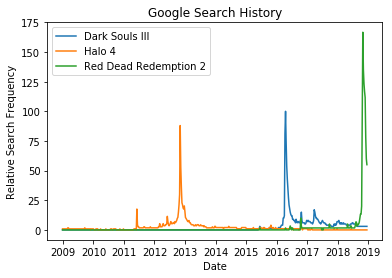

In [21]:
#All searches normalized to Dark Souls III
fig,ax = plt.subplots(1,1)
ax.plot(alltrends_12["Dark Souls III"])
ax.plot(alltrends_12["Halo 4"])
ax.plot(alltrends_12["Red Dead Redemption 2"])
ax.set_title('Google Search History')
ax.set_ylabel('Relative Search Frequency')
ax.set_xlabel('Date')
ax.legend()